# Garment Worker Productivity Prediction

## 1. Data Understanding and Preprocessing 
###  Dataset Exploration

In the cell below, we:

* Importing all the necessary libraries.

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In the cell below, `garments_worker_productivity.csv` as `df`:

In [2]:
# Loading the data
df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Now you want to get familiar with the data. This step includes:

* Understanding the dimensionality of your dataset

* Investigating what type of data it contains, and the data types used to store it

* Discovering how missing values are encoded, and how many there are

* Getting a feel for what information it does and doesn't contain

* check the existing columns

In [3]:
#Understanding the dimensionality of your dataset
df.shape

(1197, 15)

In [4]:
#Investigating what type of data it contains, and the data types used to store it
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [5]:
#Discovering how missing values are encoded, and how many there are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
#check the existing columns
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

### Data Cleaning

In this cell we see the descriptive statistics for numerical columns, such as mean, standard deviation, min, and max.

In [7]:
#descriptive statistics for numerical columns, such as mean, standard deviation, min, and max.
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


* Look out for missing values and try to figure out how we can handle them

In [8]:
# Checking null values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

* Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")

* Drop rows with missing values

The whole dataset has 1197 rows and the highest column having missing values is `wip` which has 506 missing values which is about 42.27% of our data.

we see that the null values have a very high impact on our data set therefore we decide to fill in missing values with a placeholder i.e the median.

Now, implement the strategy to fill in missing values using code.

In [9]:
# Calculate the median of the 'wip' column and fill missing values
if 'wip' in df.columns:
    wip_median = df['wip'].median()
    df['wip'].fillna(wip_median, inplace=True)

# Verify that there are no missing values in the 'wip' column after the operation
missing_values_after_fill = df['wip'].isnull().sum()
missing_values_after_fill

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

we see that there are no miising values all of them have been filled so we go ahead and drop  duplicate rows as they are of no essence and doesn't contain any much vivid information, detect and manage outliers

In [11]:
df = df.drop_duplicates()

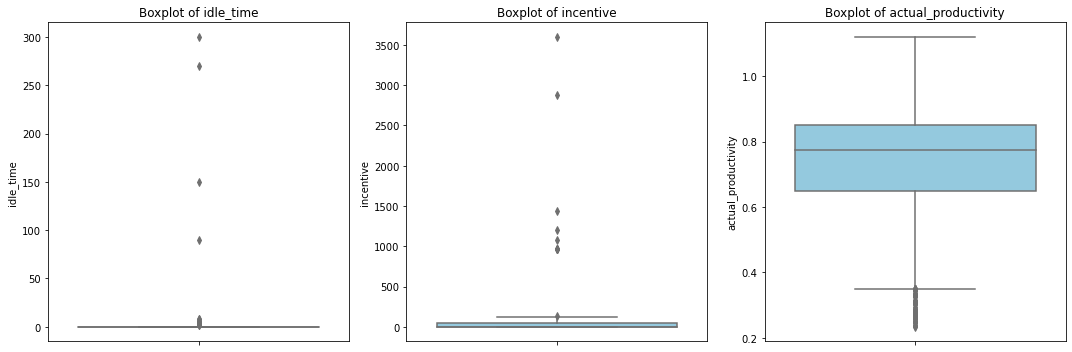

In [12]:
# Function to plot outliers using boxplots
def plot_outliers(df, columns):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)  # Create subplots for each column
        sns.boxplot(y=df[column], color='skyblue')
        plt.title(f"Boxplot of {column}")
        plt.ylabel(column)
    plt.tight_layout()
    plt.show()

# Columns to visualize
columns_to_plot = ['idle_time', 'incentive', 'actual_productivity']

# Call the function
plot_outliers(df, columns_to_plot)

From the boxplots above we evidently see the presence of outliers in some of the columns so we go ahead and manage them by the use of IQR Method.

In [13]:
# Function to detect and manage outliers using IQR
def manage_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values outside the range
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Columns to process
columns_to_clean = ['idle_time', 'incentive', 'actual_productivity']

# Apply the function
df = manage_outliers(df, columns_to_clean)

we now plot the columns again to be sure the outliers have been well managed.

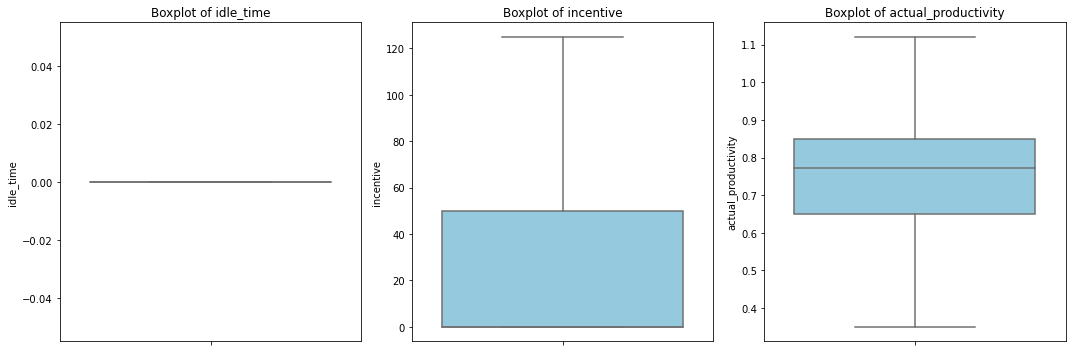

In [14]:
# Function to plot outliers using boxplots
def plot_outliers(df, columns):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)  # Create subplots for each column
        sns.boxplot(y=df[column], color='skyblue')
        plt.title(f"Boxplot of {column}")
        plt.ylabel(column)
    plt.tight_layout()
    plt.show()

# Columns to visualize
columns_to_plot = ['idle_time', 'incentive', 'actual_productivity']

# Call the function
plot_outliers(df, columns_to_plot)

From the boxplots above,it is clear that all the outliers are well managed.

### Feature Engineering
For categorical features (e.g., quarter, department), Perform one-hot encoding.

In [15]:
# Clean the data
df['department'] = df['department'].str.strip().str.lower()
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['quarter', 'department'], drop_first=False)
df.head()

,date,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing
0,1/1/2015,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0,0,0,1
1,1/1/2015,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,0,1,0
2,1/1/2015,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1
3,1/1/2015,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1
4,1/1/2015,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0,0,0,0,0,1


 Extract useful date features such as month and day_of_week

In [16]:
# Convert the date column to a pandas datetime object
df['date'] = pd.to_datetime(df['date'])

# Extract useful features
df['month'] = df['date'].dt.month  # Extract month (1-12)
df['day_of_week'] = df['date'].dt.dayofweek  # Extract day of the week (0=Monday, 6=Sunday)
#df['day_name'] = df['date'].dt.day_name()  # Extract day name (e.g., Monday
df

,date,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,...,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,month,day_of_week
0,2015-01-01,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,...,0.940725,1,0,0,0,0,0,1,1,3
1,2015-01-01,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,...,0.886500,1,0,0,0,0,1,0,1,3
2,2015-01-01,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,...,0.800570,1,0,0,0,0,0,1,1,3
3,2015-01-01,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,...,0.800570,1,0,0,0,0,0,1,1,3
4,2015-01-01,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,...,0.800382,1,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,...,0.628333,0,1,0,0,0,1,0,3,2
1193,2015-03-11,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,...,0.625625,0,1,0,0,0,1,0,3,2
1194,2015-03-11,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,...,0.625625,0,1,0,0,0,1,0,3,2
1195,2015-03-11,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,...,0.505889,0,1,0,0,0,1,0,3,2


### Feature Scaling
Using StandardScaler scale numerical features (e.g., smv, over_time) for consistency 
in model training. 

In [17]:
# Initialize the scaler
scaler = StandardScaler()

# Select numerical columns to scale
columns_to_scale = ['smv', 'over_time']

# Scale the numerical features
df_scaled = df.copy()  # To keep original data intact
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df_scaled

,date,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,...,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,month,day_of_week
0,2015-01-01,Thursday,8,0.80,1.014552,1108.0,0.750589,98,0.0,0,...,0.940725,1,0,0,0,0,0,1,1,3
1,2015-01-01,Thursday,1,0.75,-1.016778,1039.0,-1.077682,0,0.0,0,...,0.886500,1,0,0,0,0,1,0,1,3
2,2015-01-01,Thursday,11,0.80,-0.333878,968.0,-0.271092,50,0.0,0,...,0.800570,1,0,0,0,0,0,1,1,3
3,2015-01-01,Thursday,12,0.80,-0.333878,968.0,-0.271092,50,0.0,0,...,0.800570,1,0,0,0,0,0,1,1,3
4,2015-01-01,Thursday,6,0.80,0.990783,1170.0,-0.790895,50,0.0,0,...,0.800382,1,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Wednesday,10,0.75,-1.111853,1039.0,-1.077682,0,0.0,0,...,0.628333,0,1,0,0,0,1,0,3,2
1193,2015-03-11,Wednesday,8,0.70,-1.020434,1039.0,-1.077682,0,0.0,0,...,0.625625,0,1,0,0,0,1,0,3,2
1194,2015-03-11,Wednesday,7,0.65,-1.020434,1039.0,-1.077682,0,0.0,0,...,0.625625,0,1,0,0,0,1,0,3,2
1195,2015-03-11,Wednesday,9,0.75,-1.111853,1039.0,-0.826743,0,0.0,0,...,0.505889,0,1,0,0,0,1,0,3,2


## 2. Exploratory Data Analysis (EDA)

### Target Variable Analysis: 

○ Analyze the distribution of actual_productivity to understand its spread.

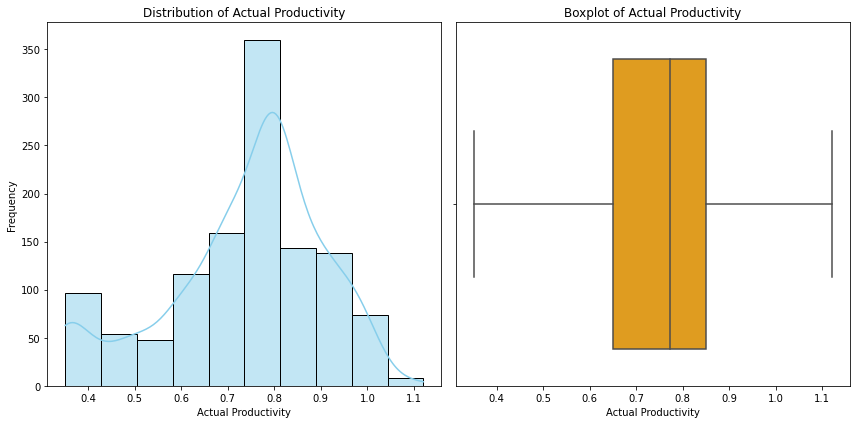

Summary Statistics for Actual Productivity:
count    1197.000000
mean        0.737397
std         0.168772
min         0.350389
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64


In [20]:
# Analyze the distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_scaled['actual_productivity'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_scaled['actual_productivity'], color='orange')
plt.title('Boxplot of Actual Productivity')
plt.xlabel('Actual Productivity')

plt.tight_layout()
plt.show()

# Summary statistics
summary_stats = df_scaled['actual_productivity'].describe()
print("Summary Statistics for Actual Productivity:")
print(summary_stats)

Histogram:

* Shows how `actual_productivity` values are distributed (e.g., peaks indicating common values). From this we see that the `actual_productivity` is normally distributed suggesting balanced productivity values.

Boxplot:

* Highlights outliers (if any) as points outside the whiskers.From the boxplot we see there are no outliers in the column

* Displays the interquartile range (IQR), median, and spread.

## Feature Relationships: 
○ Use scatter plots and box plots to visualize the relationships between 
actual_productivity and features like over_time, incentive, and smv. 
